In [96]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

QUESTION 4 a)

In [99]:
def load_data():
  data_dir = '/content/data/hw1_data.csv'
  df = pd.read_csv(data_dir)
  df = df.fillna(0)
  df = df.sample(frac = 1)
  enc = LabelEncoder()
  df['Gender'] = enc.fit_transform(df['Gender'].astype('str'))
  split_1 = int(0.7 * len(df))
  split_2 = int(0.8 * len(df))
  train_data = df.iloc[:split_1]
  val_data = df.iloc[split_1:split_2]
  test_data = df.iloc[split_2:]
  return train_data, val_data, test_data

In [100]:
train_data, val_data, test_data = load_data()

In [101]:
train_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
280,58,1,0.8,0.2,123,56,48,6.0,3.0,1.0,1
496,24,1,1.0,0.2,189,52,31,8.0,4.8,1.5,1
158,72,1,0.7,0.1,196,20,35,5.8,2.0,0.5,1
243,28,0,0.9,0.2,316,25,23,8.5,5.5,1.8,1
118,32,1,15.9,7.0,280,1350,1600,5.6,2.8,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
129,45,1,2.8,1.7,263,57,65,5.1,2.3,0.8,1
146,66,0,2.9,1.3,168,21,38,5.5,1.8,0.4,1
562,66,1,17.3,8.5,388,173,367,7.8,2.6,0.5,1
395,45,1,0.8,0.2,140,24,20,6.3,3.2,1.0,2


QUESTION 4 b)

In [104]:
def select_knn_model(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']
  train_accuracies = []
  val_accuracies = []
  k_values = range(1, 21)

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      knn.fit(X_train, y_train)
      train_acc = accuracy_score(y_train, knn.predict(X_train))
      val_acc = accuracy_score(y_val, knn.predict(X_val))
      train_accuracies.append(train_acc)
      val_accuracies.append(val_acc)

  plt.plot(k_values, train_accuracies, label='Training Accuracy')
  plt.plot(k_values, val_accuracies, label='Validation Accuracy')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  best_k = k_values[val_accuracies.index(max(val_accuracies))]
  best_knn = KNeighborsClassifier(n_neighbors=best_k)
  best_knn.fit(X_train,y_train)
  test_acc = accuracy_score(y_test, best_knn.predict(X_test))
  print(f"Test accuracy: {test_acc}")
  return best_knn, test_acc

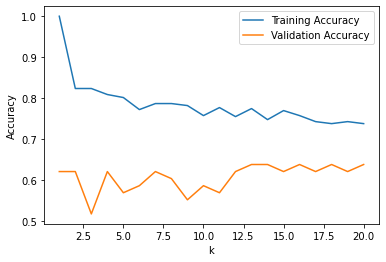

Test accuracy: 0.6410256410256411


(KNeighborsClassifier(n_neighbors=13), 0.6410256410256411)

In [108]:
select_knn_model(train_data, val_data, test_data)

QUESTION 4 c)

In [113]:
def select_knn_model(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']
  train_accuracies = []
  val_accuracies = []
  k_values = range(1, 21)

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k, metric = 'cosine')
      knn.fit(X_train, y_train)
      train_acc = accuracy_score(y_train, knn.predict(X_train))
      val_acc = accuracy_score(y_val, knn.predict(X_val))
      train_accuracies.append(train_acc)
      val_accuracies.append(val_acc)

  plt.plot(k_values, train_accuracies, label='Training Accuracy')
  plt.plot(k_values, val_accuracies, label='Validation Accuracy')
  plt.xlabel('k')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()
  best_k = k_values[val_accuracies.index(max(val_accuracies))]
  best_knn = KNeighborsClassifier(n_neighbors=best_k)
  best_knn.fit(X_train,y_train)
  test_acc = accuracy_score(y_test, best_knn.predict(X_test))
  print(f"Test accuracy: {test_acc}")
  return best_knn, test_acc

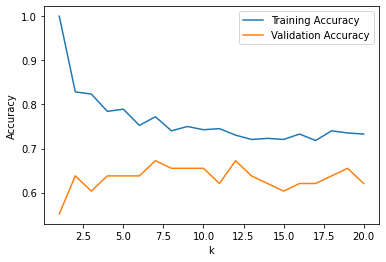

Test accuracy: 0.6666666666666666


(KNeighborsClassifier(n_neighbors=7), 0.6666666666666666)

In [110]:
select_knn_model(train_data, val_data, test_data)

QUESTION 5 a)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
def train_decision_tree(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']

  clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=1)
  clf.fit(X_train, y_train)
  train_acc = clf.score(X_train, y_train)
  print("Training accuracy: {:.2f}%".format(train_acc * 100))
  
  val_acc = clf.score(X_val, y_val)
  print("Validation accuracy: {:.2f}%".format(val_acc * 100))
  
  test_acc = clf.score(X_test, y_test)
  print("Test accuracy: {:.2f}%".format(test_acc * 100))

In [119]:
train_decision_tree(train_data, val_data, test_data)

Training accuracy: 100.00%
Validation accuracy: 63.79%
Test accuracy: 62.39%


In [120]:
# min_sample_leaf=2
def train_decision_tree(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']

  clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=2)
  clf.fit(X_train, y_train)
  train_acc = clf.score(X_train, y_train)
  print("Training accuracy: {:.2f}%".format(train_acc * 100))
  
  val_acc = clf.score(X_val, y_val)
  print("Validation accuracy: {:.2f}%".format(val_acc * 100))
  
  test_acc = clf.score(X_test, y_test)
  print("Test accuracy: {:.2f}%".format(test_acc * 100))

In [121]:
train_decision_tree(train_data, val_data, test_data)

Training accuracy: 95.34%
Validation accuracy: 58.62%
Test accuracy: 68.38%


In [122]:
# min_sample_leaf=3
def train_decision_tree(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']

  clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=2)
  clf.fit(X_train, y_train)
  train_acc = clf.score(X_train, y_train)
  print("Training accuracy: {:.2f}%".format(train_acc * 100))
  
  val_acc = clf.score(X_val, y_val)
  print("Validation accuracy: {:.2f}%".format(val_acc * 100))
  
  test_acc = clf.score(X_test, y_test)
  print("Test accuracy: {:.2f}%".format(test_acc * 100))

In [123]:
train_decision_tree(train_data, val_data, test_data)

Training accuracy: 95.34%
Validation accuracy: 51.72%
Test accuracy: 66.67%


QUESTION 5 b)

In [135]:
# min_sample_leaf=2
def train_decision_tree(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']

  clf = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_leaf=2)
  clf.fit(X_train, y_train)
  train_acc = clf.score(X_train, y_train)
  print("Training accuracy: {:.2f}%".format(train_acc * 100))
  
  val_acc = clf.score(X_val, y_val)
  print("Validation accuracy: {:.2f}%".format(val_acc * 100))
  
  test_acc = clf.score(X_test, y_test)
  print("Test accuracy: {:.2f}%".format(test_acc * 100))
  return clf

In [141]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

clf = train_decision_tree(train_data, val_data, test_data)
graph = Source(export_graphviz(clf, out_file=None, feature_names=['Age','Total_Bilirubin','Direct_Bilirubin',
                                                  'Alkaline_Phosphotase','Alamine_Aminotransferase',
                                                  'Aspartate_Aminotransferase',
                                                  'Total_Protiens', 'Albumin',
                                                  'Albumin_and_Globulin_Rati', 'Dataset']))
graph.format = 'png'
graph.render('dt', view=True)

Training accuracy: 95.34%
Validation accuracy: 58.62%
Test accuracy: 66.67%


'dt.png'

QUESTION 6

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

def train_logreg_model(train_data, val_data, test_data):
  X_train = train_data.drop('Dataset', axis = 1)
  y_train = train_data['Dataset']
  X_val = val_data.drop('Dataset', axis = 1)
  y_val = val_data['Dataset']
  X_test = test_data.drop('Dataset', axis = 1)
  y_test = test_data['Dataset']

  logistic_regression = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)
  logistic_regression.fit(X_train, y_train)

  train_acc = accuracy_score(y_train, logistic_regression.predict(X_train))
  val_acc = accuracy_score(y_val, logistic_regression.predict(X_val))
  test_acc = accuracy_score(y_test, logistic_regression.predict(X_test))
  
  print("Training accuracy: {:.2f}%".format(train_acc * 100))
  print("Validation accuracy: {:.2f}%".format(val_acc * 100))
  print("Test accuracy: {:.2f}%".format(test_acc * 100))

In [162]:
 train_logreg_model(train_data, val_data, test_data)

Training accuracy: 73.53%
Validation accuracy: 63.79%
Test accuracy: 70.09%
